### Importación de datos



In [11]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [26]:
suma_ventas1 =tienda1['Precio'].sum()



suma_ventas2 =tienda2['Precio'].sum()
suma_ventas3 =tienda3['Precio'].sum()
suma_ventas4 =tienda4['Precio'].sum()

print("Suma de ventas1:", suma_ventas1)
print("Suma de ventas2:", suma_ventas2)
print("Suma de ventas3:", suma_ventas3)
print("Suma de ventas4:", suma_ventas4)


Suma de ventas1: 1150880400.0
Suma de ventas2: 1116343500.0
Suma de ventas3: 1098019600.0
Suma de ventas4: 1038375700.0


In [27]:
data = {
    'tienda': ['tienda1', 'tienda2', 'tienda3','tienda4'],
    'ventas': [suma_ventas1, suma_ventas2, suma_ventas3,suma_ventas4]
}

df = pd.DataFrame(data)

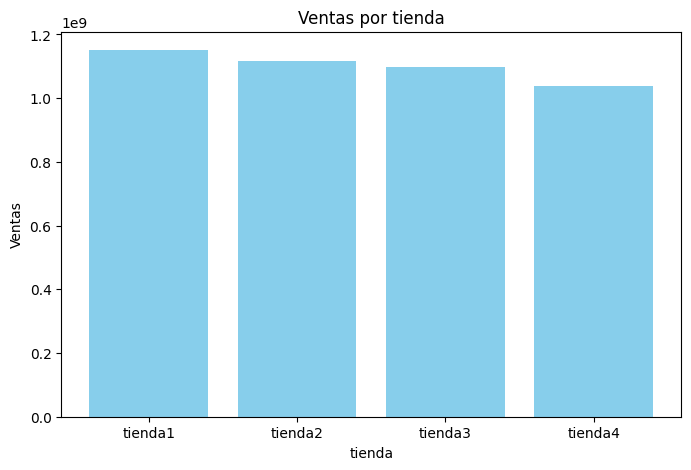

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(df['tienda'], df['ventas'], color='skyblue')
plt.title('Ventas por tienda')
plt.xlabel('tienda')
plt.ylabel('Ventas')
plt.show()

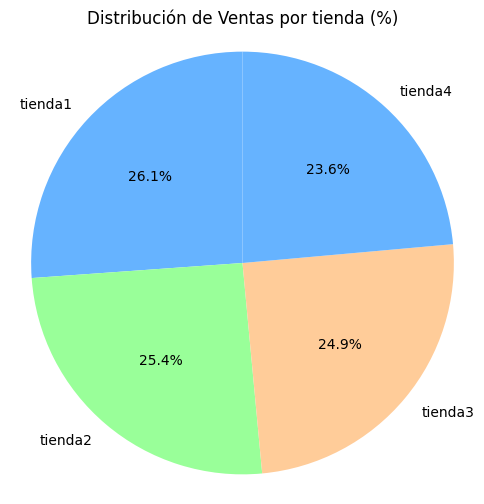

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(
    df['ventas'],
    labels=df['tienda'],
    autopct='%1.1f%%',  # Muestra el porcentaje con 1 decimal
    startangle=90,      # Comienza desde la parte superior
    colors=['#66b3ff','#99ff99','#ffcc99']  # Colores opcionales
)
plt.title('Distribución de Ventas por tienda (%)')
plt.axis('equal')  # Para que sea perfectamente circular
plt.show()


# 2. Ventas por categoría

In [34]:
ventas_por_categoria1 = tienda1.groupby('Categoría del Producto').size().sort_values(ascending=False)
print(ventas_por_categoria1)


Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
dtype: int64


In [32]:
ventas_por_categoria2 = tienda2.groupby('Categoría del Producto').size().sort_values(ascending=False)
print(ventas_por_categoria2)
ventas_por_categoria3 = tienda3.groupby('Categoría del Producto').size().sort_values(ascending=False)
print(ventas_por_categoria3)
ventas_por_categoria4 = tienda4.groupby('Categoría del Producto').size().sort_values(ascending=False)
print(ventas_por_categoria4)


Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
dtype: int64
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
dtype: int64
Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes                   338
Deportes y diversión       277
Electrodomésticos          254
Artículos para el hogar    201
Libros                     187
Instrumentos musicales     170
dtype: int64


In [35]:
# Unir las series en un solo DataFrame
ventas_comparadas = pd.DataFrame({
    'tienda 1': ventas_por_categoria1,
    'tienda 2': ventas_por_categoria2,
    'tienda 3': ventas_por_categoria3,
    'tienda 4': ventas_por_categoria4
}).fillna(0)  # Rellena con 0 donde falten datos


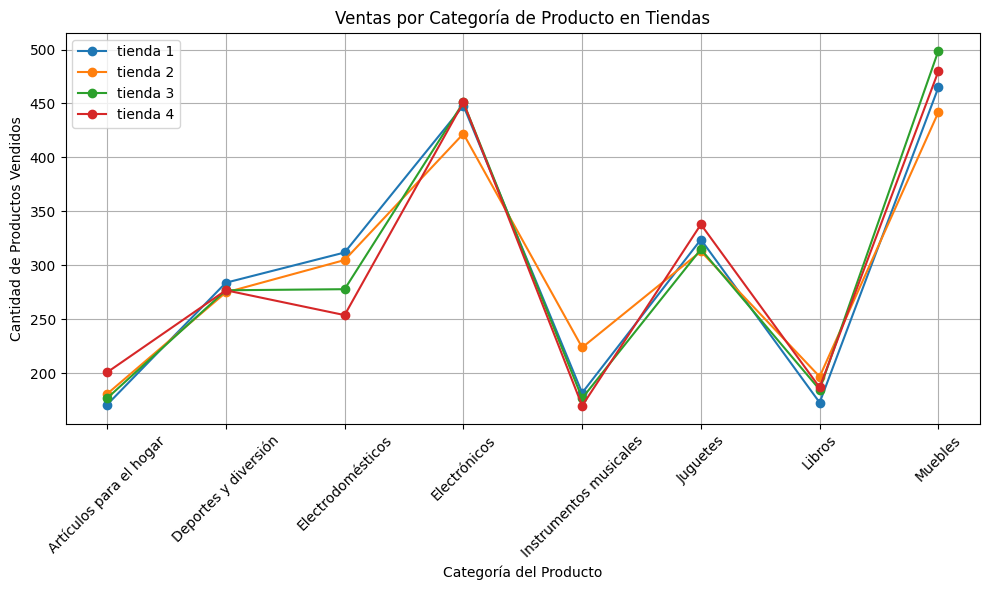

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Graficar cada tienda como una línea
for tienda in ventas_comparadas.columns:
    plt.plot(ventas_comparadas.index, ventas_comparadas[tienda], marker='o', label=tienda)

plt.title('Ventas por Categoría de Producto en Tiendas')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad de Productos Vendidos')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2.B Cantidad de productos vendidos





In [24]:
cantidad_productos_vendidos_tienda1 = tienda1['Producto'].count()
cantidad_productos_vendidos_tienda2 = tienda2['Producto'].count()
cantidad_productos_vendidos_tienda3 = tienda3['Producto'].count()
cantidad_productos_vendidos_tienda4 = tienda4['Producto'].count()

print("cantidad_productos_vendidos_tienda1:", cantidad_productos_vendidos_tienda1)
print("cantidad_productos_vendidos_tienda2:", cantidad_productos_vendidos_tienda2)
print("cantidad_productos_vendidos_tienda3:", cantidad_productos_vendidos_tienda3)
print("cantidad_productos_vendidos_tienda4:", cantidad_productos_vendidos_tienda4)

cantidad_productos_vendidos_tienda1: 2359
cantidad_productos_vendidos_tienda2: 2359
cantidad_productos_vendidos_tienda3: 2359
cantidad_productos_vendidos_tienda4: 2358


# 3. Calificación promedio de la tienda


In [37]:
promedio_calificacion1 = tienda1['Calificación'].mean()
promedio_calificacion2 = tienda2['Calificación'].mean()
promedio_calificacion3 = tienda3['Calificación'].mean()
promedio_calificacion4 = tienda4['Calificación'].mean()


print("Promedio de calificacion1:", promedio_calificacion1)
print("Promedio de calificacion2:", promedio_calificacion2)
print("Promedio de calificacion3:", promedio_calificacion3)
print("Promedio de calificacion4:", promedio_calificacion4)

Promedio de calificacion1: 3.976685036032217
Promedio de calificacion2: 4.037303942348453
Promedio de calificacion3: 4.048325561678677
Promedio de calificacion4: 3.9957591178965224


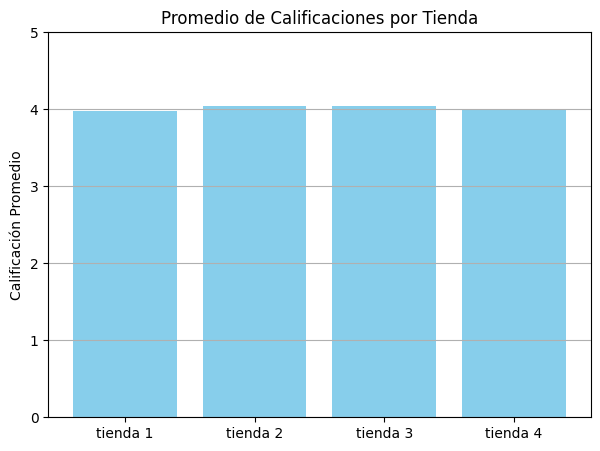

In [39]:
import matplotlib.pyplot as plt

promedios = [promedio_calificacion1, promedio_calificacion2, promedio_calificacion3,promedio_calificacion4]
tiendas = ['tienda 1', 'tienda 2', 'tienda 3','tienda 4']

plt.figure(figsize=(7, 5))
plt.bar(tiendas, promedios, color='skyblue')
plt.title('Promedio de Calificaciones por Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5)
plt.grid(axis='y')
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
ventas_por_Producto1_mas = tienda1.groupby('Producto').size().sort_values(ascending=False)
ventas_por_Producto1_menos= tienda1.groupby('Producto').size().sort_values(ascending=True)

print(ventas_por_Producto1_mas[:4])
print(ventas_por_Producto1_menos[:4])

Producto
Armario             60
TV LED UHD 4K       60
Microondas          60
Secadora de ropa    58
dtype: int64
Producto
Auriculares con micrófono    33
Celular ABXY                 33
Olla de presión              35
Pandereta                    36
dtype: int64


In [ ]:
ventas_por_Producto2_mas = tienda2.groupby('Producto').size().sort_values(ascending=False)
ventas_por_Producto2_menos= tienda2.groupby('Producto').size().sort_values(ascending=True)

print(ventas_por_Producto2_mas[:4])
print(ventas_por_Producto2_menos[:4])

Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Pandereta                    58
dtype: int64
Producto
Juego de mesa      32
Impresora          34
Mesa de comedor    34
Sillón             35
dtype: int64


In [ ]:
ventas_por_Producto3_mas = tienda3.groupby('Producto').size().sort_values(ascending=False)
ventas_por_Producto3_menos= tienda3.groupby('Producto').size().sort_values(ascending=True)

print(ventas_por_Producto3_mas[:4])
print(ventas_por_Producto3_menos[:4])

Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
dtype: int64
Producto
Bloques de construcción    35
Set de vasos               36
Mochila                    36
Microondas                 36
dtype: int64


In [ ]:
ventas_por_Producto4_mas = tienda4.groupby('Producto').size().sort_values(ascending=False)
ventas_por_Producto4_menos= tienda4.groupby('Producto').size().sort_values(ascending=True)

print(ventas_por_Producto4_mas[:4])
print(ventas_por_Producto4_menos[:4])

Producto
Cama box                   62
Cubertería                 59
Cama king                  56
Dashboards con Power BI    56
dtype: int64
Producto
Guitarra eléctrica             33
Armario                        34
Guitarra acústica              37
Ciencia de datos con Python    38
dtype: int64


# 5. Envío promedio por tienda

In [40]:
promedio_Costo_de_envio1 = tienda1['Costo de envío'].mean()
promedio_Costo_de_envio2 = tienda2['Costo de envío'].mean()
promedio_Costo_de_envio3 = tienda3['Costo de envío'].mean()
promedio_Costo_de_envio4 = tienda4['Costo de envío'].mean()

print("promedio_Costo_de_envio1:",promedio_Costo_de_envio1)
print("promedio_Costo_de_envio2:",promedio_Costo_de_envio2)
print("promedio_Costo_de_envío3:",promedio_Costo_de_envio3)
print("promedio_Costo_de_envío4:",promedio_Costo_de_envio4)



promedio_Costo_de_envio1: 26018.60958033065
promedio_Costo_de_envio2: 25216.235693090293
promedio_Costo_de_envío3: 24805.680373039424
promedio_Costo_de_envío4: 23459.457167090754


In [41]:
data = {
    'tienda': ['tienda1', 'tienda2', 'tienda3','tienda4'],
    'promedio_Costo_de_envio': [promedio_Costo_de_envio1, promedio_Costo_de_envio2, promedio_Costo_de_envio3,promedio_Costo_de_envio4]
}

df = pd.DataFrame(data)

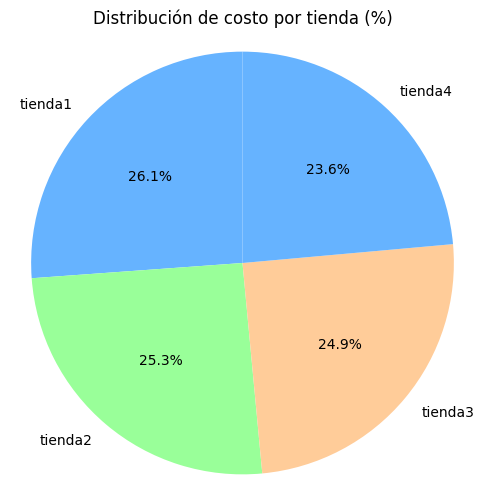

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(
    df['promedio_Costo_de_envio'],
    labels=df['tienda'],
    autopct='%1.1f%%',  # Muestra el porcentaje con 1 decimal
    startangle=90,      # Comienza desde la parte superior
    colors=['#66b3ff','#99ff99','#ffcc99']  # Colores opcionales
)
plt.title('Distribución de costo por tienda (%)')
plt.axis('equal')  # Para que sea perfectamente circular
plt.show()

**Fecha** 19 de abril 2025

***Cristina Perez***


# INTRODUCCION

Este informe tiene como objetivo analizar el desempeño de las  ventas de cuatro tiendas durante un período determinado. A partir de los resultados, se realiza una evaluación comparativa para determinar cuál tienda debería incrementar sus ventas o cual deberia cerrar definitivamente considerando los resultados obtenidos.

** VENTAS TOTALES POR TIENDA**

Los datos de ventas totales fueron los siguientes:

Tiendas | Ventas Totales

Tienda 1 | 1,150,880,400.00

Tienda 2 | 1,116,343,500.00

Tienda 3 | 1,098,019,600.00

Tienda 4 | 1,038,375,700.00





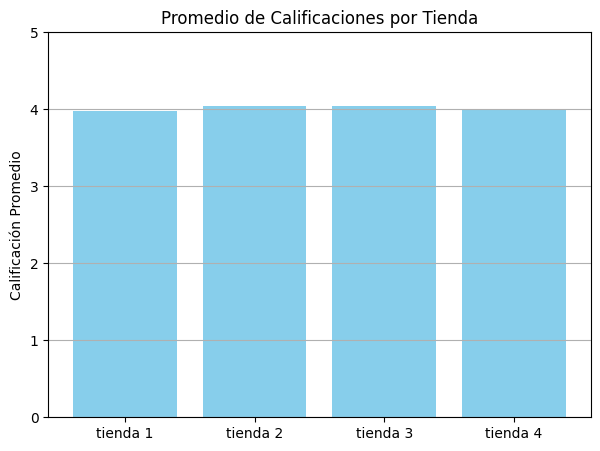


Del analisis podemos observar :




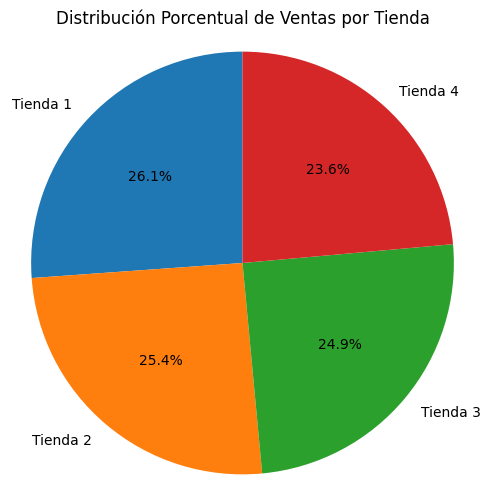

Tienda 1 fue la que mayor facturación registró, representando aproximadamente el 26.3% del total vendido entre las cuatro tiendas.

Tienda 4 fue la de menor desempeño, con 1,038 millones, lo que representa un 23.7% del total, y una diferencia de más de 112 millones respecto a Tienda 1.

#Ventas por categoría

Como observamos en el punto Ventas por categoría, se visualiza que cada tienda mantiene una rotacion de productos similares.


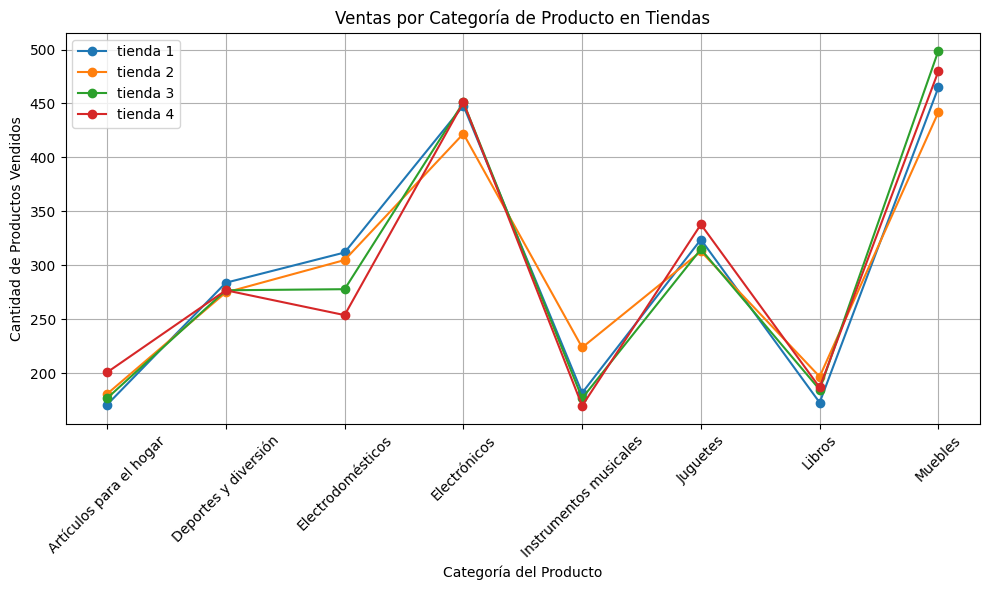

# Calificación promedio de la tienda

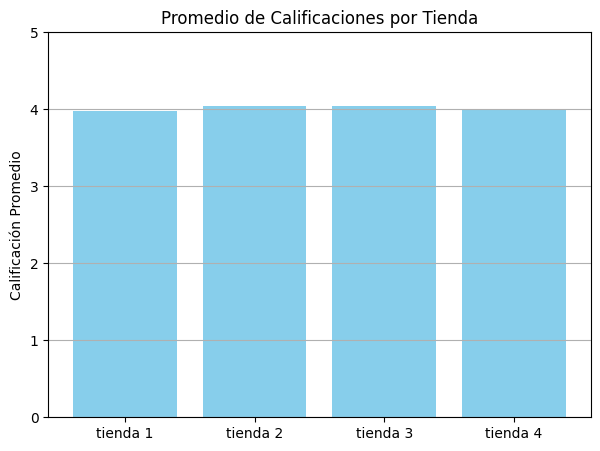



Este gráfico de barras muestra el promedio de calificaciones otorgadas por los clientes a cada una de las cuatro tiendas.

Es un dato muy útil pero no es relevante para decidir si vender o no alguna tienda, pero si complementa el  informe de ventas, ya que ayuda a evaluar no solo el rendimiento económico sino también la satisfacción del cliente.

Además del análisis financiero, se evaluó la experiencia del cliente a través de la calificación promedio recibida por cada tienda. A continuación, los resultados:

-Tienda 2 y Tienda 3 obtuvieron las calificaciones promedio más altas, ligeramente por encima de 4.0.

-Tienda 1 y Tienda 4 tuvieron calificaciones apenas inferiores, cercanas al 4.0.

-Todas las tiendas están dentro de un rango considerado positivo, lo que indica un buen nivel de satisfacción general entre los clientes.

# Conclusión

Segun los resultados obtenidos podemos concluir que la tienda 4 es la que debería enfocarse en aumentar sus ventas y evitar su cierre. Si bien su volumen total es considerable, su participación en el total general es la más baja (23.7%) y presenta una diferencia importante respecto al resto.

# Recomendaciones para mejorar y evitar la venta de una tienda

Evaluar la  ubicación, precios y promociones en Tienda 4 para identificar posibles barreras a la venta.

Considerar campañas especiales o alianzas locales que impulsen las ventas   en esa sucursal.
